## SVMs

In the following, we will take data generated (artificially) by the make_classification routine of sklearn and apply SVM to it. First, the imports.

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn.metrics import *
from sklearn.cross_validation import cross_val_score

import seaborn as sns
sns.set(style="white")

from sklearn.svm import SVC

from __future__ import print_function

In [59]:
# template: make_classification(n_samples, n_features, n_informative, n_redundant, n_classes = 2, weights, random_state)
num_samples = 200
X, y = make_classification(num_samples, 2, 2, 0, weights=[.6, .4], random_state=25)

In [60]:
num_training = 100
num_test = num_samples - num_training

In [73]:
# Randomly shuffle the inputs.
from sklearn.utils import shuffle
X, y = shuffle(X, y, random_state = 15)

#### Plots
We plot the training and the test data. 

[(-5, 5),
 (-5, 5),
 None]

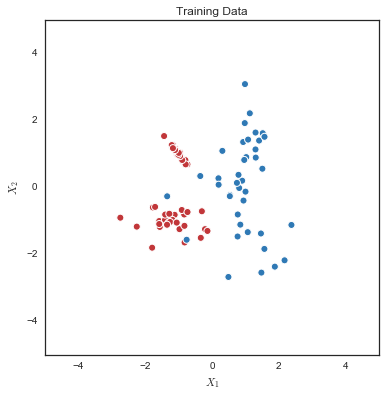

In [63]:
# training data.
f, ax = plt.subplots(figsize=(8, 6))

ax.scatter(X[:num_training,0], X[:num_training, 1], c=y[:num_training], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set_title('Training Data')

ax.set(aspect="equal",
       xlim=(-5, 5), ylim=(-5, 5),
       xlabel="$X_1$", ylabel="$X_2$")

[(-5, 5),
 (-5, 5),
 None]

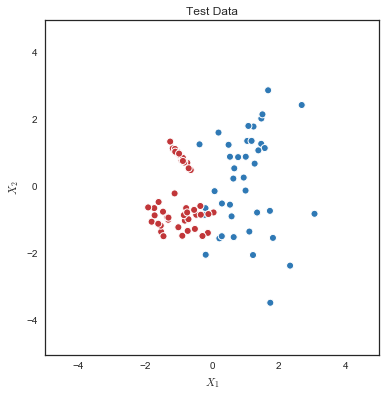

In [65]:
f, ax = plt.subplots(figsize=(8, 6))

# Plot the outputs on the test data.
ax.scatter(X[num_training:,0], X[num_training:, 1], c=y[num_training:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set_title('Test Data')

ax.set(aspect="equal",
       xlim=(-5, 5), ylim=(-5, 5),
       xlabel="$X_1$", ylabel="$X_2$")

In [66]:

# fit the SVM
clf = SVC(kernel='linear')
clf.fit(X[:num_training], y[:num_training])
y_pred = clf.predict(X[num_training:])
y_true = y[num_training:]

print(clf.get_params())
# report metrics
print("Accuracy =", clf.score(X[:num_training], y[:num_training]))

{'kernel': 'linear', 'C': 1.0, 'verbose': False, 'probability': False, 'degree': 3, 'shrinking': True, 'max_iter': -1, 'decision_function_shape': None, 'random_state': None, 'tol': 0.001, 'cache_size': 200, 'coef0': 0.0, 'gamma': 'auto', 'class_weight': None}
Accuracy = 0.97


In [67]:
print(confusion_matrix(y_true, y_pred))

[[56  3]
 [ 4 37]]


In [68]:
print(precision_score(y_true, y_pred))
print(recall_score(y_true, y_pred))

0.925
0.90243902439


In [69]:
print(log_loss(y_true, y_pred))

2.41773833557
